# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
#seu código aqui
X_test = pd.read_csv("X_test.csv", delimiter=',')
X_train = pd.read_csv("X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')

In [3]:
X_test

,Age,Income,Number of Children,Gender_LE,Marital Status_LE,Home Ownership_LE,Credit Score_LE,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.000000,5500000.0,0,0,1,1,0,1,0,0,0
1,48.000000,8750000.0,1,0,0,0,1,0,1,0,0
2,26.000000,5500000.0,1,0,0,0,0,1,0,0,0
3,39.000000,6250000.0,2,0,0,0,1,1,0,0,0
4,35.000000,9000000.0,1,0,0,0,1,0,1,0,0
5,25.000000,5500000.0,0,0,1,1,0,1,0,0,0
6,48.000000,8250000.0,1,0,0,0,1,0,1,0,0
7,48.000000,8250000.0,1,0,0,0,1,0,1,0,0
8,36.000000,9500000.0,2,0,0,0,1,0,0,0,1
9,37.507692,9500000.0,1,0,0,0,1,0,0,1,0


In [4]:
X_train

,Age,Income,Number of Children,Gender_LE,Marital Status_LE,Home Ownership_LE,Credit Score_LE,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,4.500000e+06,0,0,1,1,0,0,0,0,0
1,29.000000,2.750000e+06,0,0,1,1,2,0,0,1,0
2,25.000000,6.250000e+06,0,0,1,1,0,1,0,0,0
3,29.000000,6.800000e+06,2,0,0,0,0,0,1,0,0
4,31.000000,6.500000e+06,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
247,27.139269,3.680365e+06,0,0,1,1,2,0,0,0,0
248,27.000000,3.750000e+06,0,0,1,1,2,0,0,1,0
249,28.510747,2.994626e+06,0,0,1,1,2,0,0,0,0
250,27.417411,3.541294e+06,0,0,1,1,2,0,0,0,0


In [5]:
y_test

,Credit Score
0,Average
1,High
2,Average
3,High
4,High
5,Average
6,High
7,High
8,High
9,High


In [6]:
y_train

,Credit Score
0,Average
1,Low
2,Average
3,Average
4,Average
...,...
247,Low
248,Low
249,Low
250,Low


In [7]:
# Verificar se as classes estão balanceadas em y_test
test_balance = y_test.value_counts()
print("Balanceamento em y_test:")
print(test_balance)

Balanceamento em y_test:
Credit Score
High            29
Average          6
Low              6
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Inicialmente, é necessário realizarmos o pré-processamento dos dados, etapa esta que já foi realizada em módulos anteriores.

Então, com os dados processados e separados em base de treinamento e teste, podemos realizar o treinamento do modelo de Árvore de Decisão, com a criação de instância utilizando o DecisionTreeClassifier e definição de hiperparâmetros como profundidade máxima da árvore (max_depth), critério de divisão (gini ou entropy) e número mínimo de amostras por folha, e ajuste do modelo aos dados de treino usando fit(X_train, y_train).


Posteriormente, avaliamos o potencial preditivo e o desempenho do modelo, utilizando predict(X_test) e métricas de avaliação, como acurácia, recall, Matriz de Confusão, Precisão e F1-score.

Caso haja necessidade de melhorar o modelo, tendo julgado que seu desempenho foi insatisfatório, ajustaremos os hiperparâmetros para evitar que ocorra um overfitting (aumentando CCP e/ou limitando max_depth), e avaliaremos a importância das features na nossa Árvore para decidir se será melhor fazer com que o modelo trabalhe apenas com as de maior relevância, ou se é necessário mantermos outras variáveis.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [8]:
#seu código aqui
arvore_cs = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_cs.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [9]:
print(arvore_cs.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [10]:
previsoes = arvore_cs.predict(X_train)
acuracia = accuracy_score(y_train, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


Como a acurácia retornou um valor de 100%, podemos inferir que houve um overfitting do modelo aos dados da base de treino, o que pode resultar em problemas futuros, na má generalização quando aplicado à base de teste. Antes de realizar qualquer ajuste nos hiperparâmetros, vamos avaliar o desempenho do modelo na base de teste, abaixo.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [11]:
#seu código aqui
arvore_cs = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_cs.fit(X_test, y_test)

DecisionTreeClassifier(random_state=0)

In [12]:
previsoes = arvore_cs.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia:", acuracia)

Acurácia: 1.0


In [13]:
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00         6
        High       1.00      1.00      1.00        29
         Low       1.00      1.00      1.00         6

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



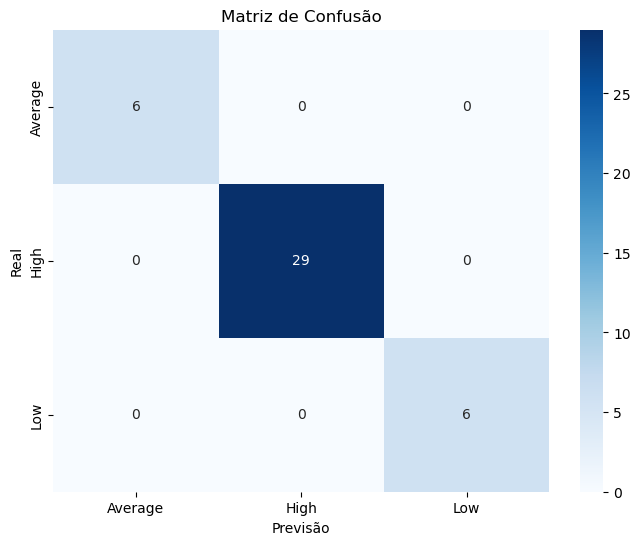

In [14]:
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Average', 'High', 'Low'],
            yticklabels=['Average', 'High', 'Low'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Tendo o modelo apresentado 100% de acurácia e em todas as outras métricas, tanto para a base de treino quanto para o teste, não há razões para acreditar que houve um problema do modelo.

Talvez a nossa base de dados seja pequena o bastante para que a Árvore consiga fazer todas as predições corretamente, pois não há indícios de que houve memorização de dados advindos do treino para o teste.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

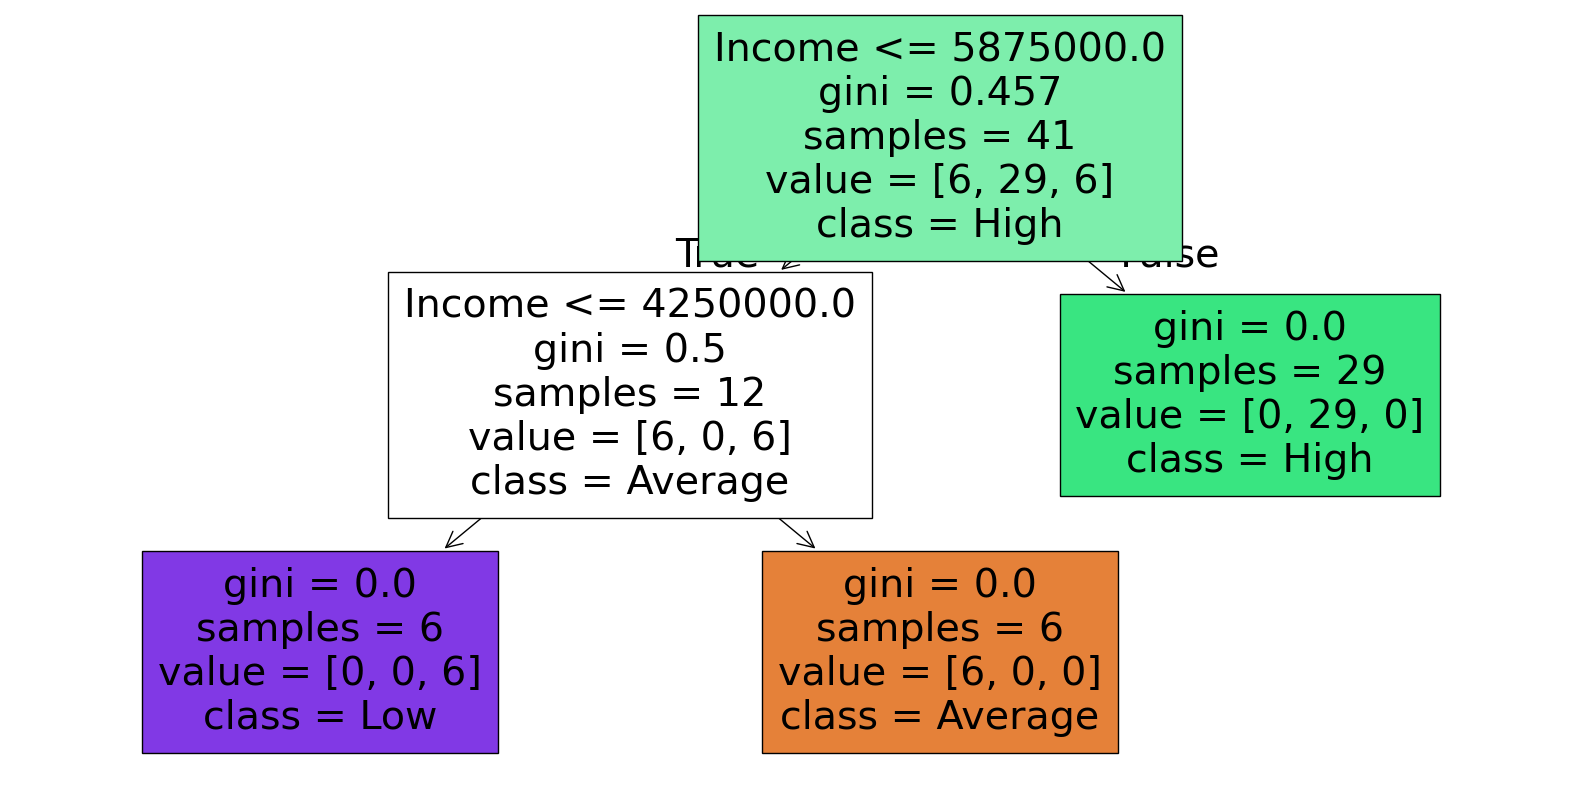

In [15]:
#seu código aqui
plt.figure(figsize=(20,10))
plot_tree(arvore_cs, filled=True, feature_names=X_train.columns, class_names=['Average', 'High', 'Low'])
plt.show()

In [16]:
# Obtendo a profundidade da árvore
profundidade = arvore_cs.get_depth()
print("A profundidade da árvore é:", profundidade)

A profundidade da árvore é: 2


# 6) Identifique as 2 principais features do modelo.


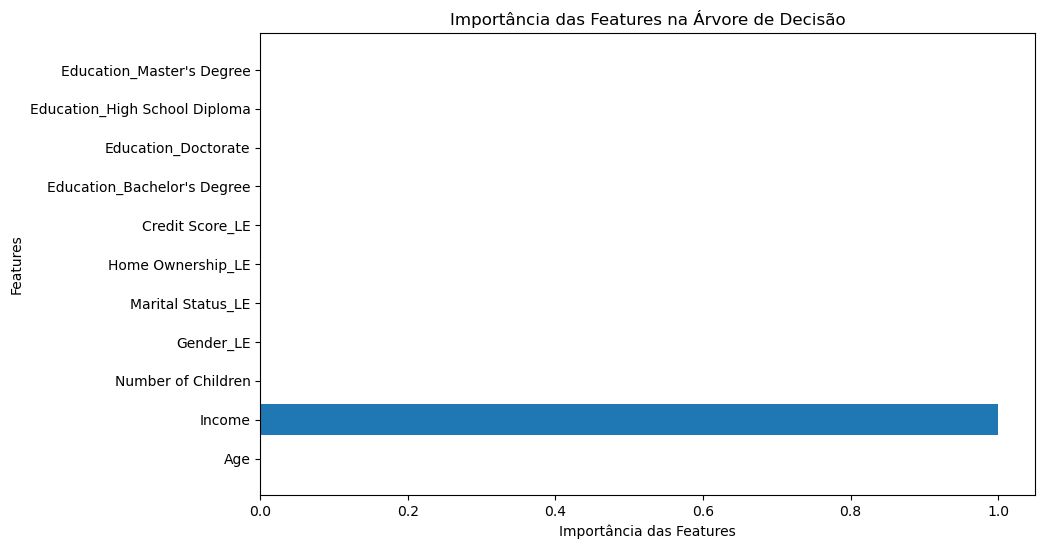

In [17]:
#seu código aqui
# Obtendo a importância das características do modelo de árvore de decisão
importancias_features = arvore_cs.feature_importances_

# Obtendo os nomes das características
nomes_features = X_train.columns

# Criando um gráfico de barras para visualizar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

A única feature que se demonstrou relevante para o modelo foi a "Income".

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

Como apenas uma feature foi classificada como relevante, esta parte da tarefa será realizada apenas com ela.

In [18]:
#seu código aqui
X_train_reduzido = X_train[['Income']]
X_test_reduzido = X_test[['Income']]

In [19]:
arvore_cs_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_cs_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
previsoes_reduzido = arvore_cs_reduzido.predict(X_test_reduzido)
relatorio = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

     Average       0.67      1.00      0.80         6
        High       1.00      0.90      0.95        29
         Low       1.00      1.00      1.00         6

    accuracy                           0.93        41
   macro avg       0.89      0.97      0.92        41
weighted avg       0.95      0.93      0.93        41



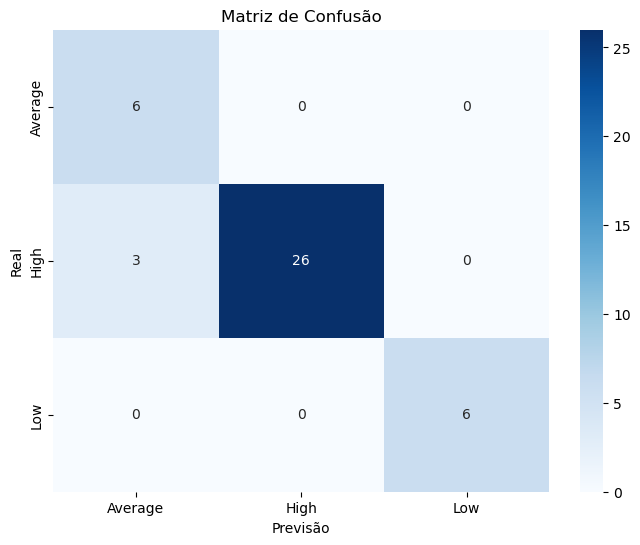

In [21]:
matriz_confusao = confusion_matrix(y_test, previsoes_reduzido)

# Plotando a matriz de confusão como um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Average', 'High', 'Low'],
            yticklabels=['Average', 'High', 'Low'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

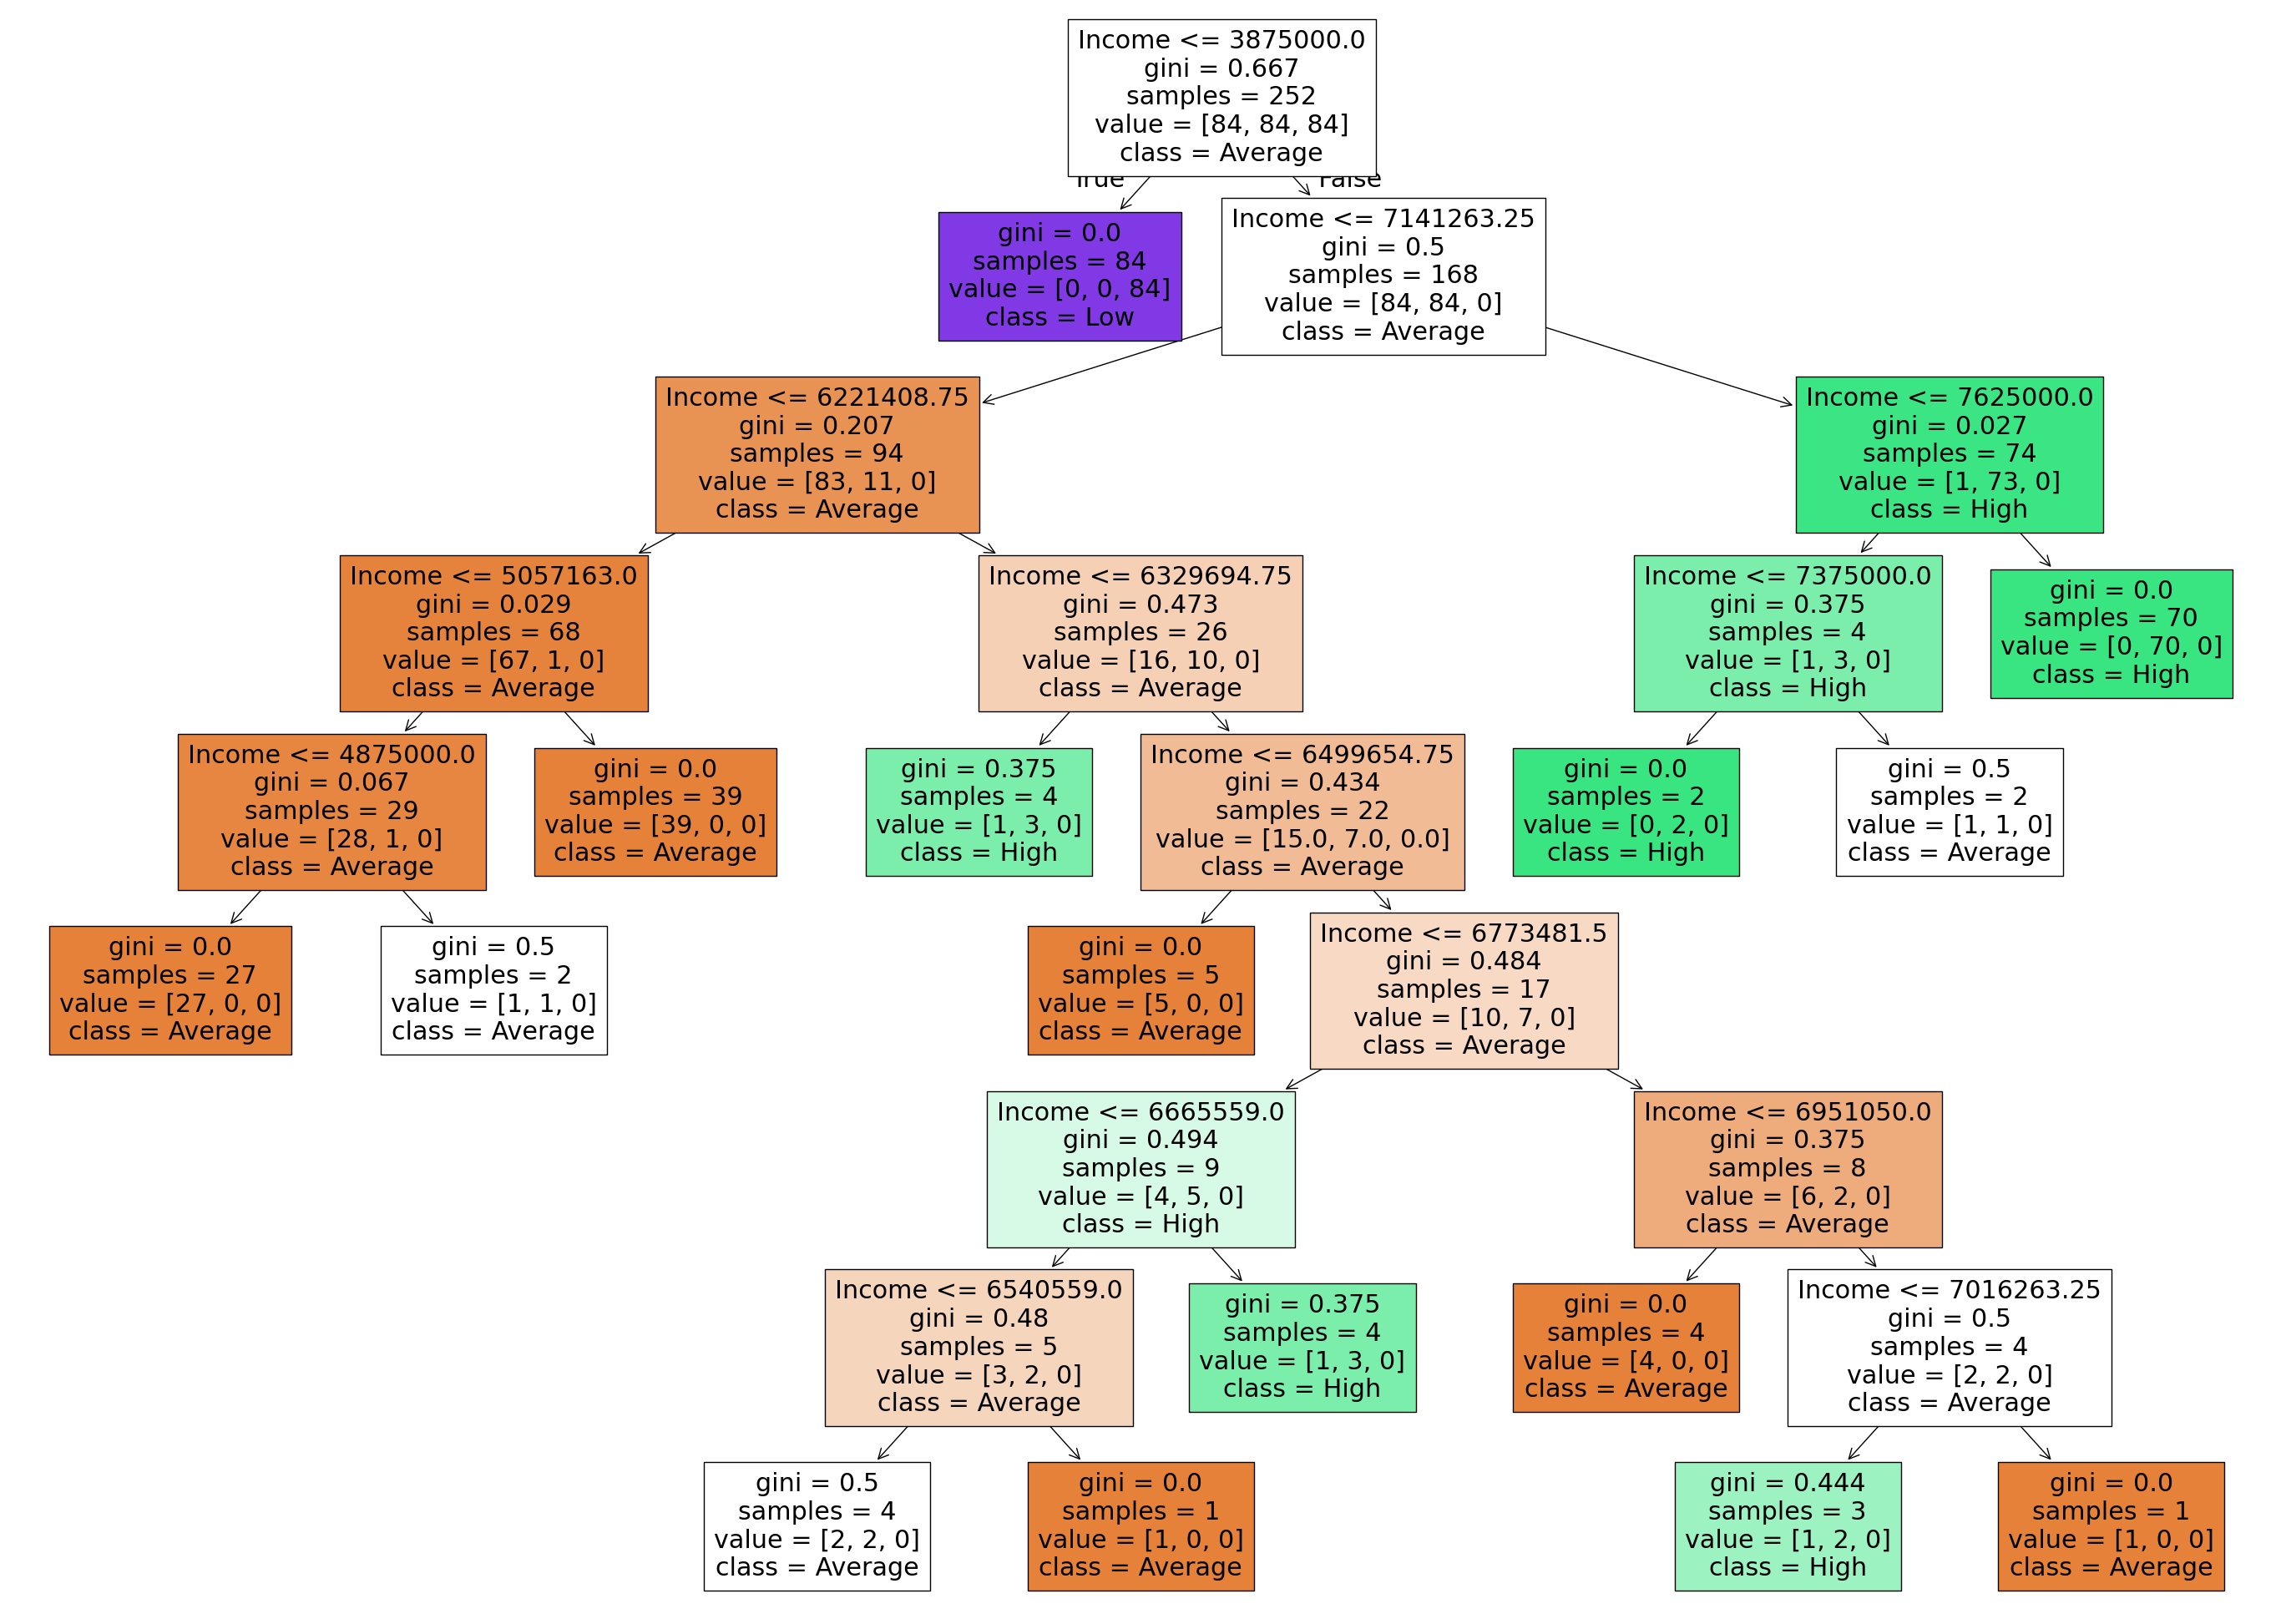

In [22]:
plt.figure(figsize=(35,25))
plot_tree(arvore_cs_reduzido, filled=True, feature_names=X_train_reduzido.columns, class_names=['Average', 'High', 'Low'])
plt.show()

Mesmo apresentando valores numéricos inferiores aos observados anteriormente, estes valores são muito mais realistas e confiáveis, o que leva à percepção de que o desempenho do modelo, quando utilizando apenas a feature de relevância indicada ("Income"), é superior ao modelo considerando todas as features, conseguindo generalizar a sua predição e separar as diferentes classes de acordo com uma maior complexidade de classificação.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Quando levando em consideração todas as features, avaliando apenas os valores obtidos, a Árvore de Decisão apresenta resultados superiores ao algoritmo de Naive Bayes, contudo estes valores não parecem ser realistas, justamente por apresentarem acurácia de 100% em ambos os casos de treino e teste na Árvore.

Já para quando avaliamos a Árvore de Decisão utilizando apenas a feature relevante, seus resultados são, de forma geral, semelhantes àqueles obtidos com a utilização do algoritmo de Naive Bayes, retornando as mesmas classificações em ambas as previsões.

Sendo assim, o desempenho dos dois modelos é semelhante, mas quando generalizamos as features sendo analisadas, a Árvore de Decisão se adequa de maneira superior ao algoritmo de Naive Bayes, tendo resultados, novamente, **NÚMERICOS** melhores, mas que, ao meu ver, não condizem de fato com a realidade.